In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import os, sys
from dotenv import load_dotenv

In [2]:
rpath = os.path.abspath(r"C:\Users\HP\Desktop\week01_telecom")
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import dataLoder
telecom_df = dataLoder()

In [3]:
from src.utils import plot_hist

In [4]:
telecom_df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [5]:
telecom_filterd = telecom_df.dropna(subset = ['MSISDN/Number', 'Bearer Id'])
telecom_filterd.isna().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                             160
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [6]:
telecom_df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:

# Select relevant columns
relevant_columns = ['MSISDN/Number', 'Bearer Id', 'Start', 'End', 'Dur. (ms)',
                    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)',
                    'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
                    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
                    'Other UL (Bytes)', 'Total DL (Bytes)','Total UL (Bytes)']
user_data = telecom_df[relevant_columns]

# Group by user (MSISDN) and calculate desired metrics
user_behavior = user_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'nunique',  # Number of xDR sessions (unique Bearer Ids)
    'Dur. (ms)': 'sum',  # Total session duration
    **{app + ' DL (Bytes)': 'sum' for app in ['HTTP', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']},  # Total download per application
    **{app + ' UL (Bytes)': 'sum' for app in ['HTTP', 'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']},  # Total upload per application
    'Total DL (Bytes)': 'sum',  # Total download volume
    'Total UL (Bytes)': 'sum'   # Total upload volume

    # 'Total DL (Bytes)': lambda user_data: user_data.filter(like=' DL').sum(),  # Total download volume
    # 'Total UL (Bytes)': lambda user_data: user_data.filter(like=' UL').sum()   # Total upload volume
})

# Reset index to move 'MSISDN/Number' from row index to a column
user_behavior = user_behavior.reset_index()

pd.DataFrame(user_behavior)
user_behavior


,MSISDN/Number,Bearer Id,Dur. (ms),HTTP DL (Bytes),Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),...,HTTP UL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,3.360100e+10,1,116720.0,0.0,2206504.0,3337123.0,837400.0,14900201.0,10265105.0,8.110911e+08,...,0.0,25631.0,1051882.0,493962.0,6724347.0,16915876.0,1367528.0,9473882.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,0.0,2598548.0,4197697.0,2828821.0,5324251.0,770569.0,1.050353e+08,...,0.0,62017.0,1137166.0,478960.0,7107972.0,10451194.0,14714780.0,2152370.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,0.0,3148004.0,3343483.0,2436500.0,2137272.0,16525919.0,5.290685e+08,...,0.0,47619.0,99643.0,768880.0,19196298.0,2827981.0,9759228.0,6607171.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,8749.0,251469.0,5937765.0,2178618.0,4393123.0,1157362.0,3.880748e+08,...,653.0,28825.0,3740728.0,106052.0,2584198.0,784730.0,3051292.0,10031701.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,185208098.0,2861230.0,13728668.0,2247808.0,10339971.0,24971647.0,1.308981e+09,...,4733818.0,51312.0,4770948.0,1057661.0,31193031.0,24230077.0,5816727.0,27160771.0,1.363130e+09,94280527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,642945.0,234320.0,6834178.0,480946.0,8294310.0,14754741.0,6.573267e+08,...,86594.0,65863.0,697091.0,525969.0,18353533.0,147797.0,3034642.0,3891534.0,6.879252e+08,26716429.0
106852,3.379000e+10,1,140988.0,0.0,442214.0,1472406.0,2513433.0,5596862.0,6929961.0,4.276202e+08,...,0.0,56355.0,3957299.0,664.0,14254710.0,1601099.0,9383076.0,6479040.0,4.445751e+08,35732243.0
106853,3.197021e+12,1,877385.0,0.0,668596.0,8572779.0,842279.0,9839889.0,10340908.0,1.645636e+08,...,0.0,46628.0,1865881.0,678492.0,2120016.0,16251392.0,13485133.0,2848373.0,1.948281e+08,37295915.0
106854,3.370000e+14,1,253030.0,0.0,496337.0,8215537.0,2989663.0,16690728.0,9983678.0,5.012590e+08,...,0.0,25229.0,1615080.0,328919.0,20044212.0,20921364.0,8883653.0,4834382.0,5.396350e+08,56652839.0


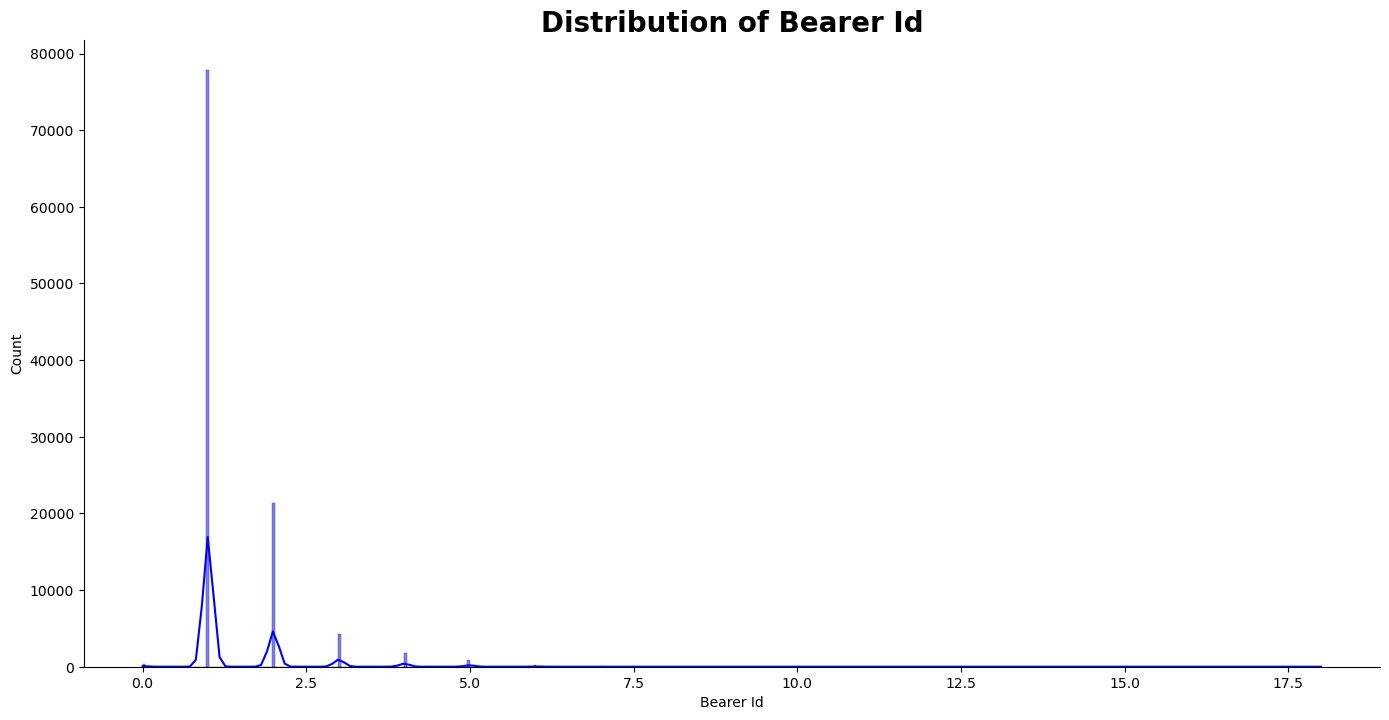

In [8]:
plot_hist(user_behavior, 'Bearer Id', "blue")


In [9]:
user_behavior['Dur. (ms)'].describe().map('{:,}'.format)

count              106,856.0
mean      146,167.1563225275
std      186,358.66967530863
min                  7,142.0
25%                 71,308.0
50%                102,740.0
75%                172,799.0
max             18,553,754.0
Name: Dur. (ms), dtype: object

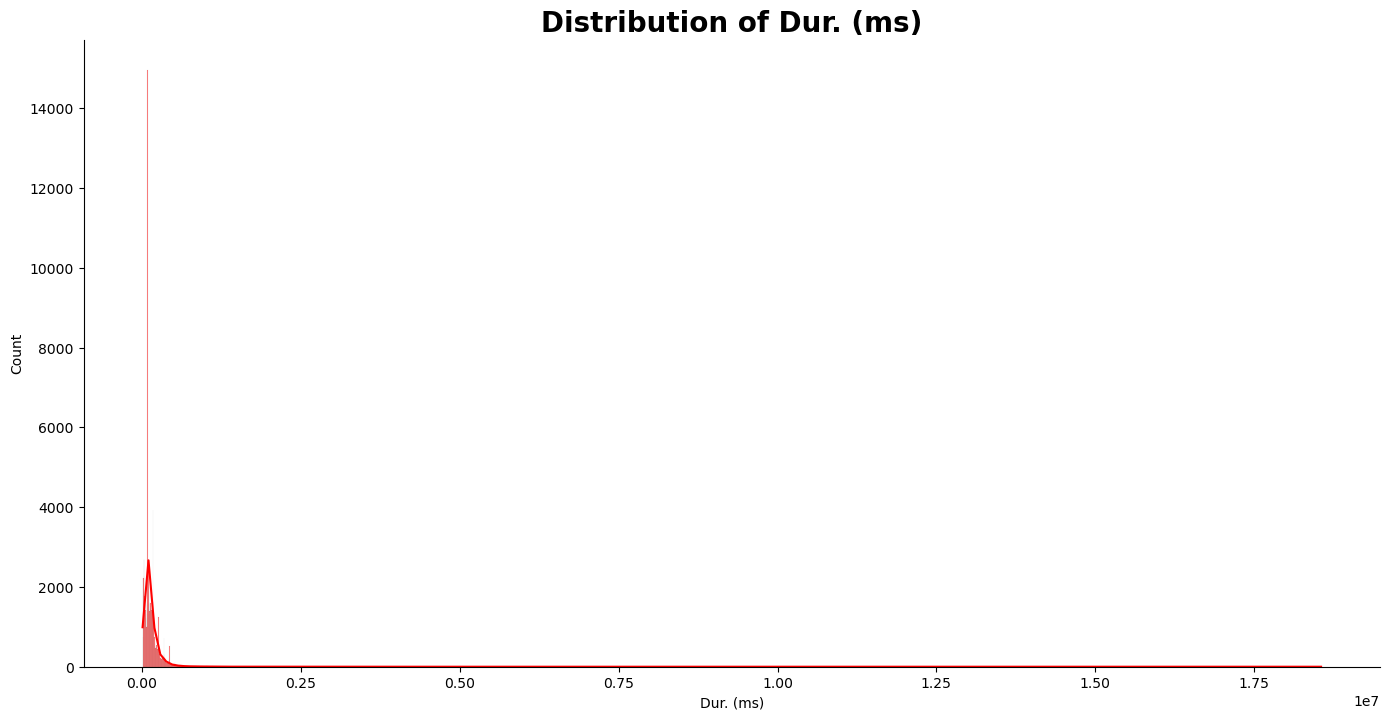

In [10]:
plot_hist(user_behavior, 'Dur. (ms)', "red")


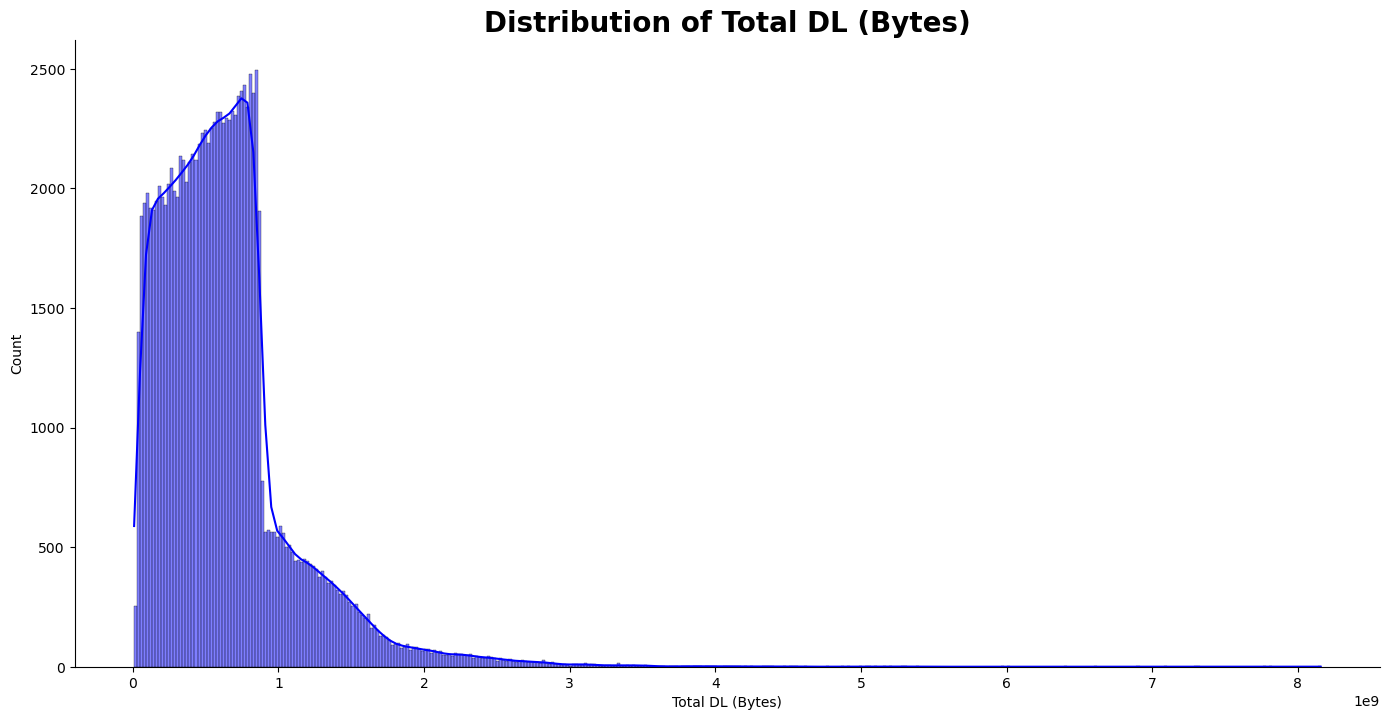

In [11]:
plot_hist(user_behavior, 'Total DL (Bytes)', "blue")


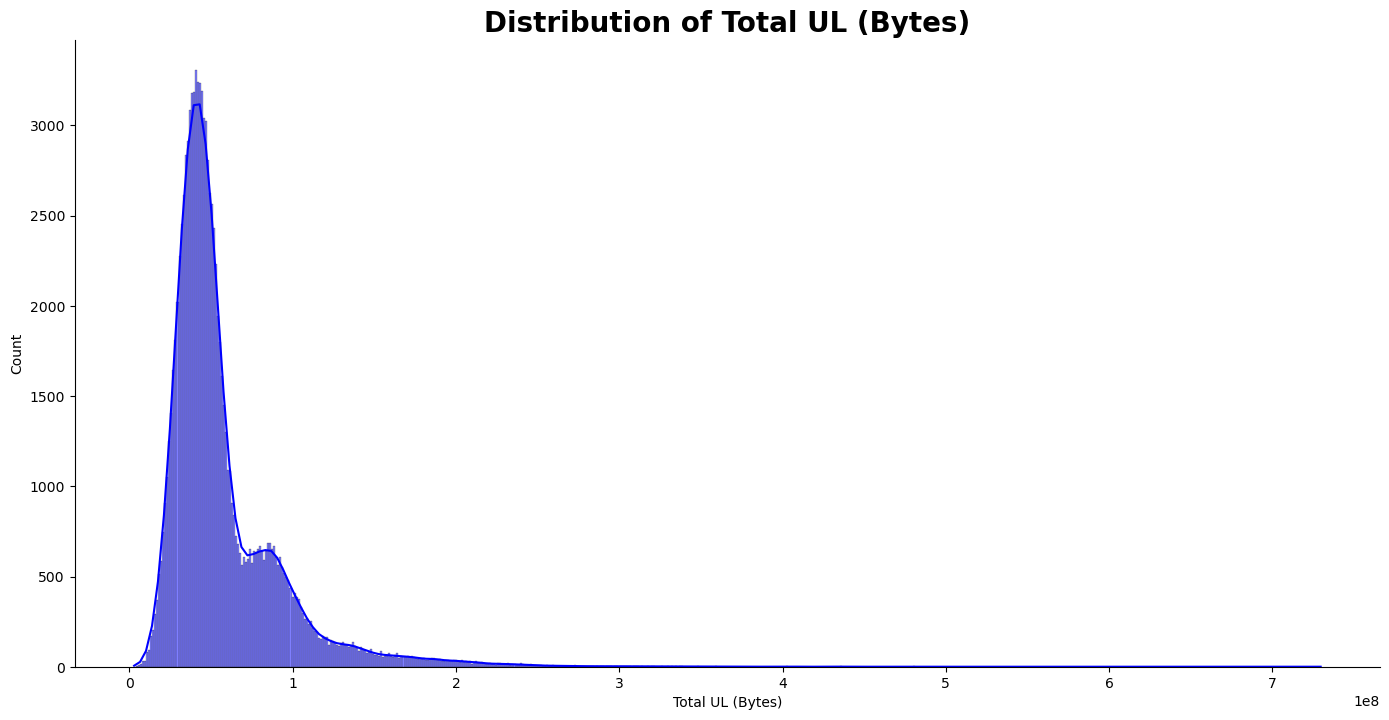

In [12]:
plot_hist(user_behavior, 'Total UL (Bytes)', "blue")
